## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
        - 3.3.1 [Checking the null Columns](#section30301)<br/>
        - 3.3.2 [Cleaning Data for price equals zero](#section30302)<br/>
        - 3.3.3 [Check whether data has new cars too](#section30303)<br/>
        - 3.3.4 [Check top 5 manufacturers car sold](#section30304)<br/>

    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [what is count of different body types of car](#section401)<br/>
    - 4.2 [who are the different manufacturers of car](#section402)<br/>
    - 4.3 [Correlation of Features](#section403)<br/>
    - 4.4 [What is the survival rate considering the Embarked variable?](#section404)<br/>
    - 4.5 [Price Behavior vs Year](#section405)<br/>
    - 4.6 [Count of Car Manufacturers sold in Ukraine in duration of ten years each](#section406)<br/>
    - 4.7 [Count of Car Registered in each decade](#section407)<br/>
    - 4.8 [Count of which eng type car is sold by Ukraine's car manufacturer](#section408)<br/>
    - 4.9 [Which eng type is sold most](#section409)<br/>
    - 4.10 [Pair plot to know the joint relationship between 'Mileage','Price','Eng type', 'Registration' and 'Year'](#section410)<br/>
    
5. [Conclusions](#section5)<br/>  

<a id=section1></a> 
## 1. Problem Statement 

    To analyze features related to car operations in Ukraine.
<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis is to submit the Term 1 project in our classroom. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

 I don't have the actual source from where the data was collected. 
- __Description__: "With little over 9500 rows, the data is collected till Year 2016. Today in Nov 2018, the market conditions of Ukraine might differ.

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. I don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

<a id=section2></a> 
### 2. Load the packages and data 

In [326]:
#import packages
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

#loading dataset
carSalesDF = pd.read_csv("car_sales.csv")



<a id=section3></a> 
### 3. Data Profiling



Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a> 
### 3.1 Understanding the Dataset



To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [327]:
carSalesDF.dtypes                                                                       # Display the data type for each variable

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [194]:
carSalesDF.head()   

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [195]:
#Generates descriptive statistics that summarize the central tendency,
#dispersion and shape of a dataset’s distribution, excluding NaN values.
#Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. 

carSalesDF.describe(include = 'all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


#### Observations

As we can observe that 
1. The engV and Drive column count is less than other columns
we will check this column to check whether it has any NULL values. 
We have done this in __section 3.3.1__.

2. The Min value of Car is 0.
For the same we need to clean the data, as price can never be zero.
We have done this in __section 3.3.2__.

3. The Min value of mileage is 0
This shows us that the data set also has records for new car.
We have done this in __section 3.3.3__.

4. We can also see there are 87 unique types of car.
We will only be concentrating on the Brands which has more records.
We have done this in __section 3.3.4__.



In [196]:
carSalesDF.sample(15)         # Display a random 10 rows from the data set

,car,price,body,mileage,engV,engType,registration,year,model,drive
5195,Mercedes-Benz,5500.0,sedan,250,2.2,Diesel,no,2003,E-Class,rear
5513,Honda,6500.0,crossover,318,2.0,Petrol,yes,1997,CR-V,full
9437,Toyota,12500.0,sedan,150,2.4,Petrol,yes,2007,Camry,front
1856,Renault,11900.0,other,162,2.3,Other,yes,2011,Master ãðóç.,front
3712,BMW,12300.0,sedan,140,2.0,Petrol,yes,2005,318,rear
6490,Volkswagen,8700.0,van,244,2.5,Diesel,yes,2001,T4 (Transporter) ïàññ.,front
8961,Citroen,6700.0,van,161,1.4,Diesel,yes,2009,Nemo ïàññ.,front
533,Mitsubishi,9500.0,crossover,225,2.4,Gas,yes,2004,Outlander,full
3905,Skoda,18500.0,vagon,59,1.8,Petrol,yes,2012,Octavia Scout,full
4032,Mercedes-Benz,6999.0,sedan,330,2.0,Petrol,yes,1997,200,front


<a id=section302></a> 
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [197]:
profile = pandas_profiling.ProfileReport(carSalesDF)
profile.to_file(outputfile='car_sales_pre_Profiling.html')

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __car_sales_pre_Profiling.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a> 
### 3.3 Preprocessing


Dealing with our observations


<a id=section30301></a> 
### 3.3.1 Checking the null Columns

In [198]:
#1. The engV and Drive column count is less than other columns
#we will check this column to check whether it has any NULL values. 
carSalesDF.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

#### Observations

We were Right in our Observation, engV and Drive has 434 and 511 values as null.

Since, it is 4 and 5 percent respectively, I'm ignoring it.


<a id=section30302></a> 
### 3.3.1 Cleaning Data for price equals zero

In [199]:
#2. The Min value of Car is 0.
#For the same we need to clean the data, as price can never be zero.

carSalesDF_PriceZero = carSalesDF[ carSalesDF['price'] == 0 ]

carSalesDF.drop(carSalesDF_PriceZero.index, axis=0, inplace = True)
carSalesDF.shape


(9309, 10)

#### Observations

As you can see now our Data is reduce to 9309 records.


<a id=section30303></a> 
### 3.3.3 Check whether data has new cars too

'Car Type'


Text(0.5, 1.0, 'Number of Old and New Vehicles')

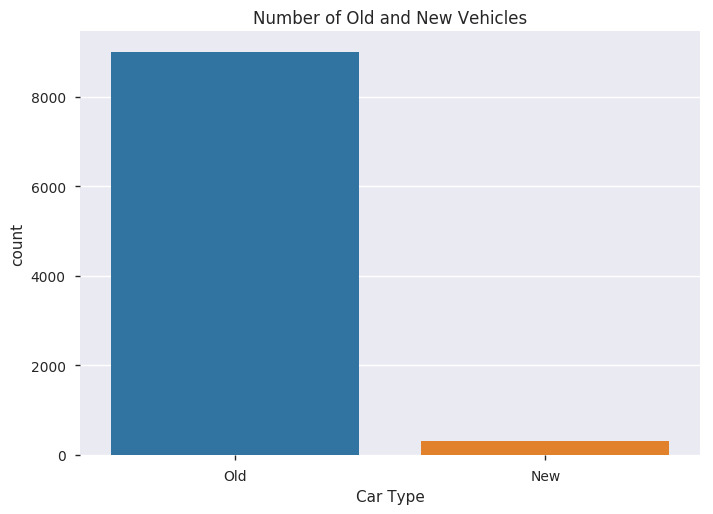

In [200]:
#3. The Min value of mileage is 0
#This shows us that the data set also has records for new car.
def newOrUsedCar(mileage):                                                     # Create a new column "age_clean" that replaces out-of-range ages with "NaN"
    if mileage==0:                                             # The oldest living person on record lived to be 122 years, 164 days (Jeanne Calment, 1875-1997)
        return "New"
    else:
        return "Old"
carSalesDF['Car Type'] = carSalesDF['mileage'].apply(newOrUsedCar)

print("'Car Type'")                                                          # Check out the new column and make sure it looks right

carSalesDF['Car Type'].value_counts().sort_index(0).value_counts()

sns.countplot(x='Car Type', data=carSalesDF).set_title('Number of Old and New Vehicles')

#### Observations

You can see data has more number of Old Cars then new cars.

Seems like people in Ukraine prefers old imported cars than buying a new one because of reduce import duty.

below is the extract from a site


By Olena Savchuk.
 Published March 31, 2016 at 11:33 pm
Meanwhile, Ukrainian used car sales and revenues are mainly in the shadows. Importers of new cars pay 30-50 percent of a vehicle’s market price in duties to the budget. A second-hand car importer pays only 10-15 percent of a car’s value to the state, using various schemes to minimize VAT and import duties, Borovik said


<a id=section30304></a> 
### 3.3.4 Check top 5 manufacturers car sold




Number of Ukraine car branch 'ZAZ's cars sold equals  100



Number of Ukraine car branch 'Bogdan's cars sold equals 2



Least 5 cars sold
Samsung        1
TATA           1
Hafei          1
Changan        1
Other-Retro    1
Name: car, dtype: int64
Top 5 cars sold
Volkswagen       908
Mercedes-Benz    852
BMW              669
Toyota           523
VAZ              480
Name: car, dtype: int64


Text(0, 0.5, 'Number of units sold')

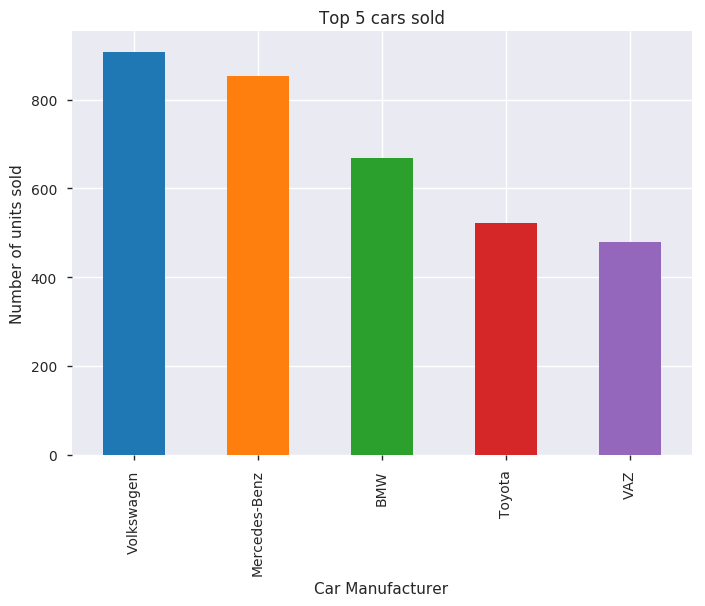

In [201]:
#4. We can also see there are 87 unique types of car.
# We will only be concentrating on the Brands which has more records.

print ("\n\n")

print ("Number of Ukraine car branch 'ZAZ's cars sold equals ",carSalesDF[carSalesDF['car'] == 'ZAZ'].shape[0])

print ("\n\n")
print ("Number of Ukraine car branch 'Bogdan's cars sold equals",carSalesDF[carSalesDF['car'] == 'Bogdan'].shape[0])



print ("\n\n")
print ("Least 5 cars sold")
print (carSalesDF['car'].value_counts().tail())

print ("Top 5 cars sold")
print (carSalesDF['car'].value_counts().head())
my_plot = carSalesDF['car'].value_counts().head().plot(kind='bar',legend=None,title="Top 5 cars sold")
my_plot.set_xlabel("Car Manufacturer")
my_plot.set_ylabel("Number of units sold")
#carSalesDF['car'].value_counts().head().plot(kind='barh')



#### Observations


Seems like people in Ukraine 
1. People buy less Cars manufactured in Ukraine
2. Also, they prefer more of European cars than Asian manufactures. 




<a id=section304></a> 
## 3.4 Post Profiling

In [202]:
profile = pandas_profiling.ProfileReport(carSalesDF)
profile.to_file(outputfile='car_sales_post_Profiling.html')

#### Observations

1. Now the dataset has 9309 rows
2. Three engine types are used mostly in car mostly petrol, diesel, gas





<a id=section401></a> 
## 4.1 what is count of different body types of car

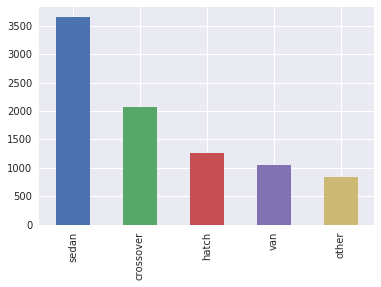

In [344]:
carSalesDF['body'].value_counts().head().plot.bar()

#### Observations

1. Sedan is prefered by customers followed by crossover





<a id=section402></a> 
## 4.2 who are the different manufacturers of car

In [204]:
carSalesDF['car'].unique()


array(['Ford', 'Mercedes-Benz', 'Nissan', 'Honda', 'Renault', 'BMW',
       'Volkswagen', 'Audi', 'Chrysler', 'Jaguar', 'Mitsubishi', 'Kia',
       'Porsche', 'Toyota', 'Hyundai', 'Opel', 'Chevrolet', 'Skoda',
       'Land Rover', 'Daewoo', 'Mazda', 'Lexus', 'Infiniti', 'Tesla',
       'Subaru', 'VAZ', 'Alfa Romeo', 'Smart', 'Peugeot', 'Suzuki',
       'Chery', 'Bentley', 'Volvo', 'SsangYong', 'Fiat', 'ZAZ', 'Citroen',
       'Dodge', 'Jeep', 'Great Wall', 'Seat', 'MINI', 'Dacia', 'Hummer',
       'Geely', 'Maserati', 'BYD', 'Cadillac', 'Acura', 'Aston Martin',
       'Rover', 'GAZ', 'GMC', 'Lincoln', 'Moskvich-AZLK', 'FAW', 'UAZ',
       'ËUAZ', 'TATA', 'ZX', 'Lifan', 'Mercury', 'Groz', 'Moskvich-Izh',
       'Saab', 'Lancia', 'Aro', 'Ferrari', 'Isuzu', 'Bogdan', 'Dadi',
       'Rolls-Royce', 'Other-Retro', 'MG', 'Samand', 'JAC', 'Samsung',
       'Lamborghini', 'Daihatsu', 'Hafei', 'SMA', 'Changan', 'Barkas',
       'Huanghai', 'Wartburg', 'Buick'], dtype=object)

#### Observations
We have seen there are 87 unique car manufacturers in Ukriane.

<a id=section403></a> 
## 4.3 Correlation of Features

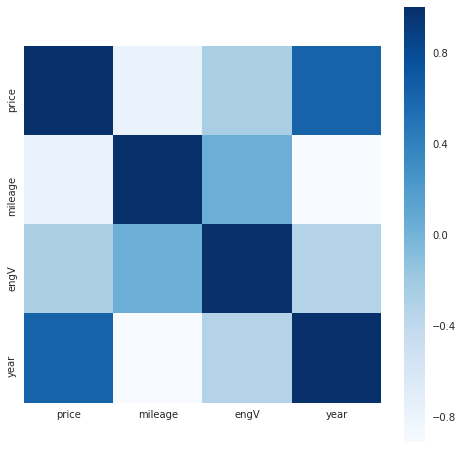

In [347]:
features_correlation = carSalesDF.corr().corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

#### Observations

From the above Correlation
- __Price and Mileage are negatively corelated.__
- __Price and Year are Positively corelated.__

Which States that 
As Mileage of the Car increases the Price Decreases
Also, Less The Number of Years car is used More is the Price


<a id=section404></a> 
## 4.4 Price Behavior vs Year

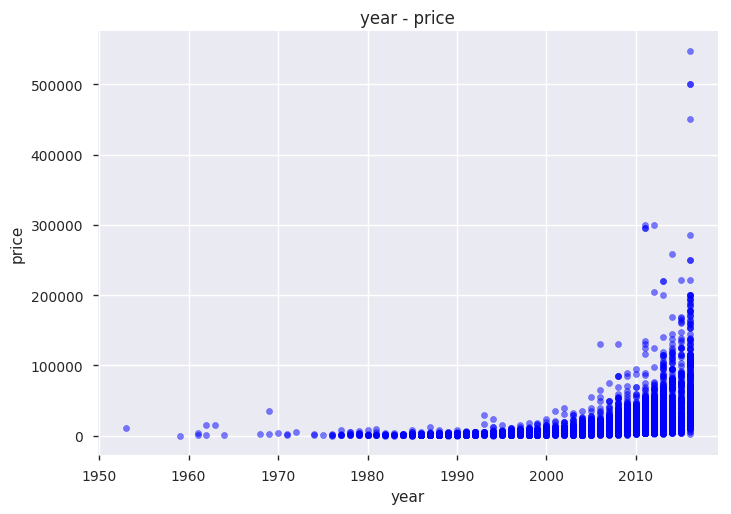

In [207]:
 http://localhost:8888/notebooks/PhytonCodes/car_sales_term1_project.ipynb#4.4-Price-Behavior-vs-Year
carSalesDF.plot(kind = 'scatter', x='year', y = 'price', alpha = 0.5, color = 'blue')
plt.xlabel("year")
plt.ylabel("price")
plt.title("year - price")
plt.show()

#### Observations

From the above scatter plot
- We can observe that price of cars were within below range until 2005 
- Then there is a little steep in price till 2013
- But after 2013 we can see big rise in car price.

We can assume that until 2005 users were buying cars from there country.
After 2013 since the import duty was decrease users purchased imported used cars.


<a id=section405></a> 
## 4.5 Percentage of Car Manufacturers sold in Ukraine

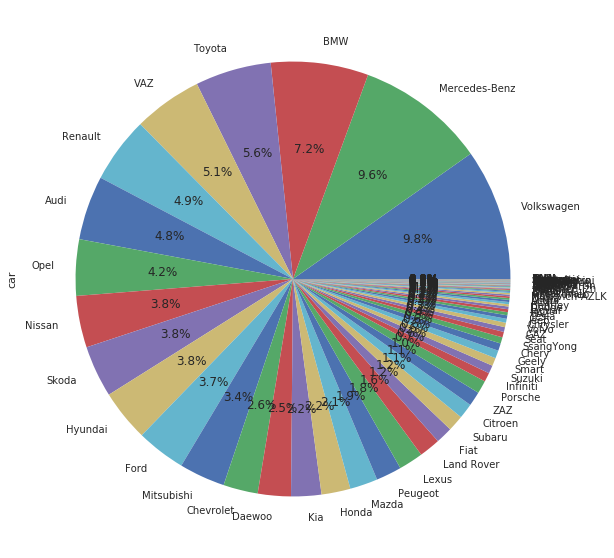

In [332]:

carSalesDF.car.value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(20,10))


### Observation
for the survey taken Vokswagen tops the list in car sales, followed by Mercedes-Benz, BMW

<a id=section406></a> 
## 4.6 Count of Car Manufacturers sold in Ukraine in duration of ten years each

Text(0.5, 1.0, 'year_range vs car sales based on car manufacturers')

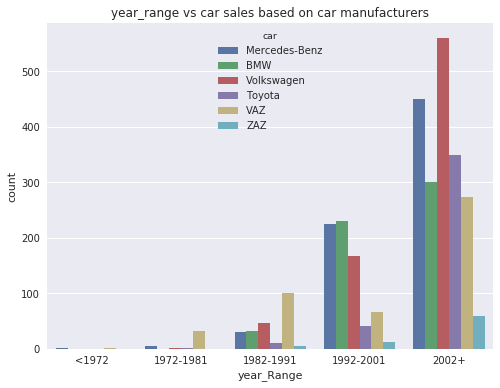

In [333]:
#only for  manufacutres in terms of top 5 sales and Russian Brand ZAZ
"""Ford', 'Mercedes-Benz', 'Nissan', 'Honda', 'Renault', 'BMW',
       'Land Rover', 'Volkswagen', 'Audi', 'Chrysler', 'Jaguar',
       'Mitsubishi', 'Kia', 'Porsche', 'Toyota', 'Hyundai', 'Opel',
       'Chevrolet', 'Skoda', 'Daewoo', 'Mazda', 'Lexus', 'Infiniti',
       'Tesla', 'Subaru', 'VAZ', 'Alfa Romeo', 'Smart', 'Peugeot',
       'Suzuki', 'Chery', 'Bentley', 'Volvo', 'SsangYong', 'Fiat', 'ZAZ',
       'Citroen', 'Dodge', 'Jeep', 'Great Wall', 'Seat', 'MINI', 'Dacia',
       'Hummer', 'Geely', 'Maserati', 'BYD', 'Cadillac', 'Acura',
       'Aston Martin', 'Rover', 'GAZ', 'GMC', 'Lincoln', 'ËUAZ',
       'Moskvich-AZLK', 'FAW', 'UAZ', 'Rolls-Royce', 'TATA', 'ZX',
       'Lifan', 'Mercury', 'Groz', 'Moskvich-Izh', 'Saab', 'Lancia',
       'Aro', 'Ferrari', 'Isuzu', 'Bogdan', 'Dadi', 'Other-Retro', 'MG',
       'Samand', 'JAC', 'Samsung', 'Lamborghini', 'Daihatsu', 'Hafei',
       'SMA', 'Fisker', 'Changan', 'Barkas', 'Huanghai', 'Wartburg',
       'Buick'"""

dfCarManufactures =carSalesDF[ carSalesDF.car.isin(['Volkswagen', 'Mercedes-Benz', 'BMW', 'Toyota', 'VAZ','ZAZ'])]
dfCarManufactures['year_Range'] = pd.cut(dfCarManufactures['year'].dropna(),
                         [1962,1972,1982,1992,2002,2012],
                         labels=['<1972','1972-1981','1982-1991','1992-2001','2002+'], include_lowest=True)

fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = dfCarManufactures,x = 'year_Range', hue='car')
plt.title('year_range vs car sales based on car manufacturers')

#### Observations

From the graph we can see
1. Before 1972 there was not much car sales
2. Volkswagen which tops the car sales in Ukraine can be seen was 3 bfore 2001 but it increased its sale after 2002
3. Seems like Volkswagen have gain trust in Ukraine 
4. Even VAZ - The Russia firm which was top seller till 1991 drop down considerably after 2002. This may be due to reduce import duty
5. As you can see ZAZ- the domestic manufacturer has lowest sales every time


<a id=section407></a> 
## 4.7 Count of Car Registered in each decade

Text(0.5, 1.0, 'year_range vs car sales based on car manufacturer')

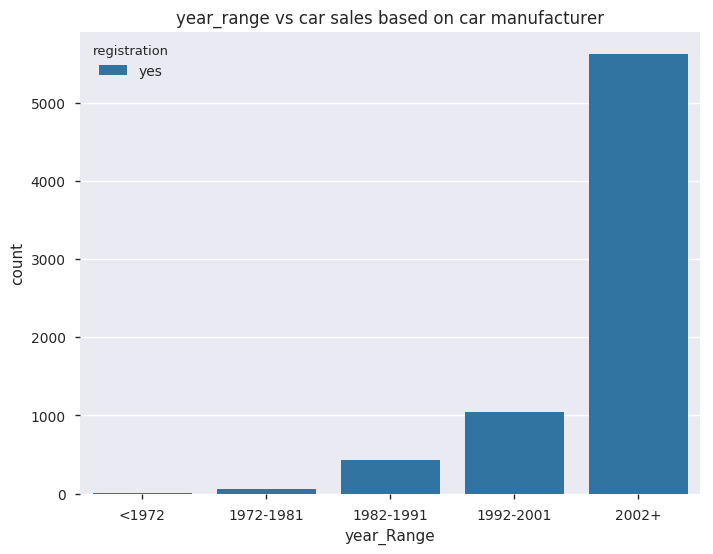

In [289]:

dfCarRegistration = carSalesDF[(carSalesDF['registration'] == "yes")]
dfCarRegistration['year_Range'] = pd.cut(dfCarRegistration['year'].dropna(),
                         [1962,1972,1982,1992,2002,2012],
                         labels=['<1972','1972-1981','1982-1991','1992-2001','2002+'], include_lowest=True)

fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = dfCarRegistration,x = 'year_Range', hue='registration')
plt.title('year_range vs car sales based on car manufacturer')


#### Observations

From the graph we can see
1. before 1972 there was not much car sales

2. The last decade after 2002+ car sales increased considerably

<a id=section407></a> 
## 4.8 Count of Car runs on which fuel in each decade

Text(0.5, 1.0, 'year_Range vs sales')

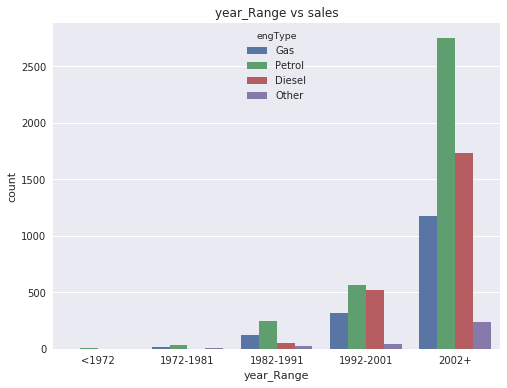

In [198]:
dfGas = data_frame

dfGas['year_Range'] = pd.cut(dfGas['year'].dropna(),
                         [1962,1972,1982,1992,2002,2012],
                         labels=['<1972','1972-1981','1982-1991','1992-2001','2002+'], include_lowest=True)

fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = dfGas,x = 'year_Range', hue='engType')
plt.title('year_Range vs Sales based on Eng Type')

#### Observations

From the graph we can see
1. Throughout the sales Petrol leads the chart
2. only during 1982-1991 GAS was ahead of Diesel - Ukraine's first compressed natural gas refueling station (CNGS) was commissioned in 1937.

3. The last decade after 2002+ car sales increaed considerably
4. Reason we have quite a healthy number of vehicles on gas, Van used in survey contribute to that

<a id=section408></a> 
## 4.8 Count of which eng type car is sold by Ukraine's car manufacturer


Text(0.5, 1.0, 'Type of eng only for ZAZ and Bogdan')

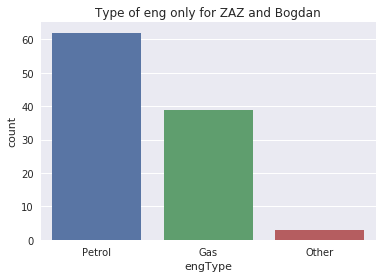

In [379]:
#Consider eng type car manufacturer in Ukraine and sold
# For this we have taken only two car manufacturers from Ukraine
carSalesOnlyForUkraineManufacturers = carSalesDF[(carSalesDF['car']=='Bogdan') | (carSalesDF['car']=='ZAZ') ]

carSalesOnlyForUkraineManufacturers['car'].value_counts().value_counts()

sns.countplot(x='engType', data=carSalesOnlyForUkraineManufacturers).set_title('Type of eng only for ZAZ and Bogdan')

#### Observations

From the graph we can see
1. For car Manufactured in Ukraine, doesn't sell Diesel cars


<a id=section409></a> 
## 4.9 Which eng type is sold most


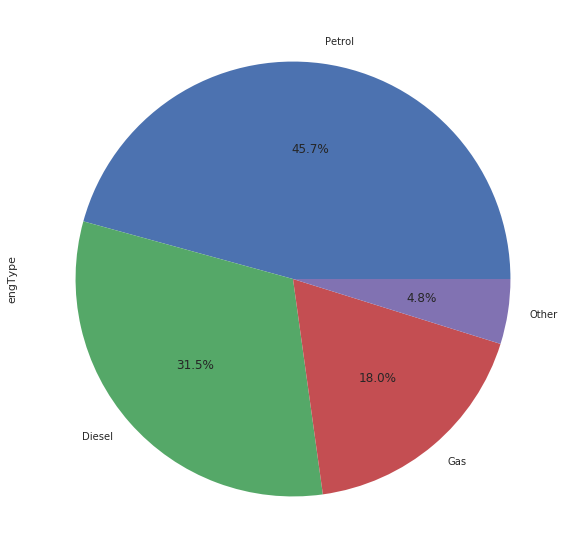

In [237]:
# Which eng type is sold most
data_frame.engType.value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(20,10))

#### Observations

From the graph we can see
1. Petrol cars are sold most in Ukraine followed by diesel and gas

<a id=section4010></a> 
## 4.10 Pair plot to know the joint relationship between 'Mileage','Price','Eng type', 'Registration' and 'Year'


Text(0.5, 1.0, 'Pair Plot')

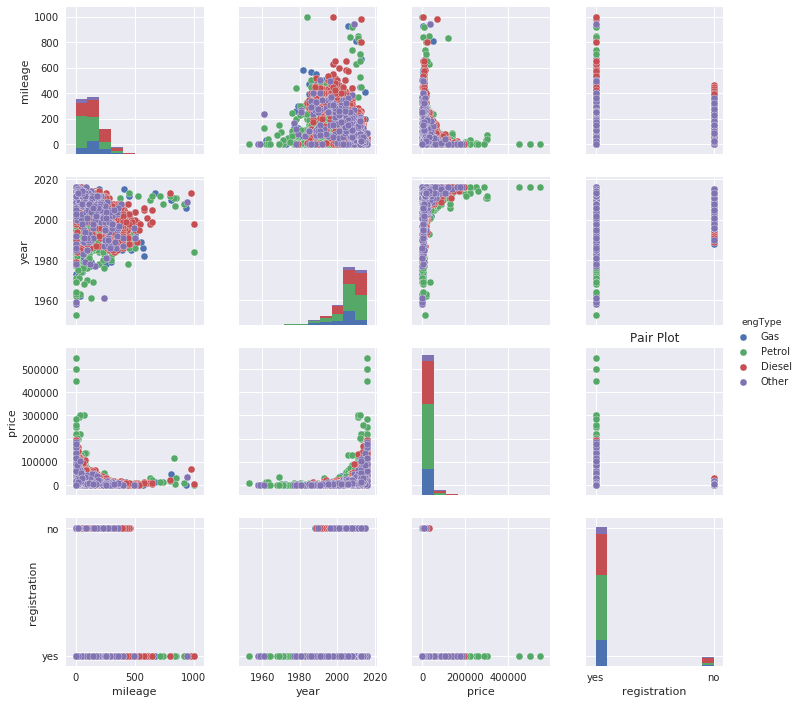

In [343]:
### Draw pair plot to know the joint relationship between 'Mileage','Eng Type','Price' , 'year', and registered
sns.pairplot(carSalesDF[["mileage","year","price","registration","engType"]],vars = ["mileage","year","price","registration"],hue="engType", dropna=True)
plt.title('Pair Plot')

#### Observations
Observing the diagonal elements,
We will see behavior of sales based on eng type in Ukraine

- Mileage of Diesel run cars are more than petrol - It means consumers prefer Diesel Car, as it is cheaper than petrol and has a better average.
- Also, you can see the petrol cars are sold more quickly - Since, in registration equals no we see no petrol cars
- Price of petrol car is more as compare to other engine types -  But it depends on manufacturer segment.
- When Mileage is Less Price is more - In that too petrol car price is more than other eng types
- Before 1960 till 1980 not much cars were sold
- All the cars before 1985 are registered.
- From 1980 to 2000 car purchased increased
- from 2000  onwards we see sudden increase in car sales that too of diesel types.
- towards the end of 2016 again there is litte drop in car sales may be due to financial crisis in Ukrian
- Also, from other pair plot you can see the price of cars has increased a lot towards the end


<a id=section4010></a> 
## 5.0 Conclusion



- From total of 9309 clean entries - from section: [__3.4 Post Profiling__](#section304)
- You can see data has more number of Old Cars then new cars. from section: [__3.3.3 Check whether data has new cars too__](#section30303)

1. Seems like people in Ukraine buy less Cars manufactured in Ukraine because of reduce import duty
2. Also, they prefer more of European cars than Asian manufactures. 
from section: [__3.3.3 Check whether data has new cars too__](#section30303) , [__4.3__](#section403)

below is the extract from a site

By Olena Savchuk. Published March 31, 2016 at 11:33 pm Meanwhile, Ukrainian used car sales and revenues are mainly in the shadows. Importers of new cars pay 30-50 percent of a vehicle’s market price in duties to the budget. A second-hand car importer pays only 10-15 percent of a car’s value to the state, using various schemes to minimize VAT and import duties, Borovik said


-  Sedan is prefered by customers followed by crossover: from section [__4.1  what is count of different body types of car__](#section401)

- We can assume that until 2005 users were buying cars from there country. After 2013 since the import duty was decrease users purchased imported used cars from section [__4.4 Price Behavior vs Year](#section404)

- for the survey taken Vokswagen tops the list in car sales, followed by Mercedes-Benz, BMW from section: [__4.5 Percentage of Car Manufacturers sold in Ukraine__](#section405)

- Taken from Ukraine press site - "VAT changes that reduce taxes to the amount paid on resale profit, rather than on the entire value of the vehicle."  increased the sales of used car more. from section: [__3.3.3  Check whether data has new cars too_](#section30303)
- Taken from Ukraine press site "Ukraine’s automobile industry lost its competitiveness after Ukraine joined the World Trade Organization and import duty on automobiles fell from 25 to 10 percent." from section: [__4.6 Count of Car Manufacturers sold in Ukraine in duration of ten years each__](#section406)
- Taken from Ukraine press site  - "Imports of foreign used cars jumped immediately after import duties were cut." from section: [__4.6 Count of Car Manufacturers sold in Ukraine in duration of ten years each__](#section406)
